In [1]:
#Import library numpy, pandas dan scikit-learn
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Netflix Userbase.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [3]:
#Menghapus kolom
dataset = dataset.drop(labels=['User ID','Subscription Type','Join Date','Last Payment Date','Plan Duration'], axis=1)
dataset

,Monthly Revenue,Country,Age,Gender,Device
0,10,United States,28,Male,Smartphone
1,15,Canada,35,Female,Tablet
2,12,United Kingdom,42,Male,Smart TV
3,12,Australia,51,Female,Laptop
4,10,Germany,33,Male,Smartphone
...,...,...,...,...,...
2495,14,Spain,28,Female,Smart TV
2496,15,Spain,33,Female,Smart TV
2497,12,United States,38,Male,Laptop
2498,13,Canada,48,Female,Tablet


In [4]:
#Mengubah kelas (kolom "Species") dari String ke Unique-Integer
dataset["Country"] = pd.factorize(dataset.Country)[0]
dataset["Gender"] = pd.factorize(dataset.Gender)[0]
dataset["Device"] = pd.factorize(dataset.Device)[0]
dataset

,Monthly Revenue,Country,Age,Gender,Device
0,10,0,28,0,0
1,15,1,35,1,1
2,12,2,42,0,2
3,12,3,51,1,3
4,10,4,33,0,0
...,...,...,...,...,...
2495,14,8,28,1,2
2496,15,8,33,1,2
2497,12,0,38,0,3
2498,13,1,48,1,1


In [10]:
X = dataset.iloc[:, [0, 4]].values
X

array([[10,  0],
       [15,  1],
       [12,  2],
       ...,
       [12,  3],
       [13,  1],
       [15,  2]], dtype=int64)

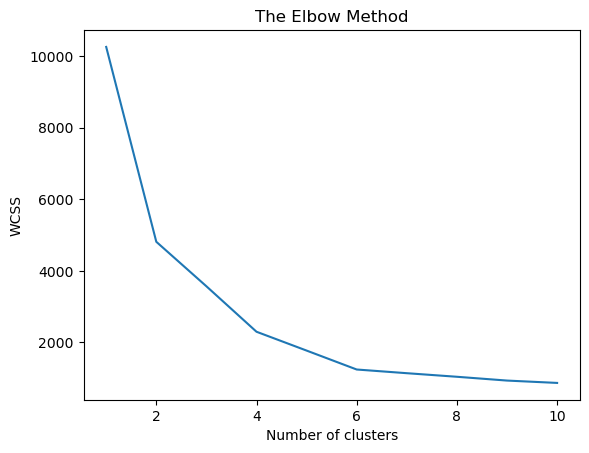

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

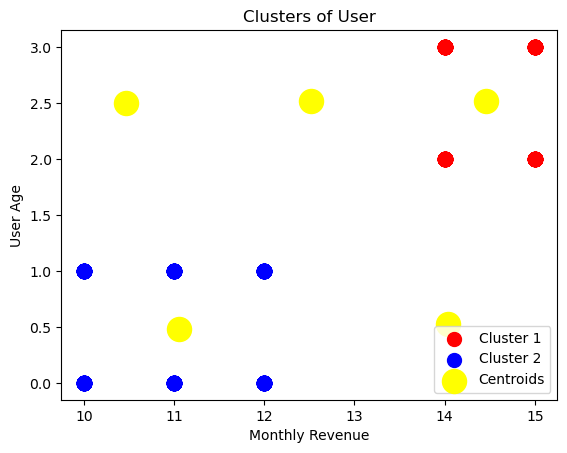

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of User')
plt.xlabel('Monthly Revenue')
plt.ylabel('User Device')
plt.legend()
plt.show()

In [14]:
# Evaluation
#labels = kmeans.labels_
from sklearn.metrics import davies_bouldin_score
w=davies_bouldin_score(X, y_kmeans)
print("Score davies bouldin ")
print(w)

Score davies bouldin 
0.7730546144967586
